In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
path =  'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head(7)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483


In [5]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## 把数据集画出来看看

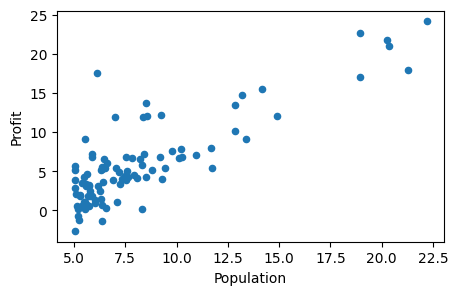

In [6]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(5,3))
plt.show()

接下来我们需要使用**梯度下降**来求出线性回归，以最小化代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中，$${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$$

In [7]:
def computeCost(X, y, theta): # 计算代价函数
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

在训练集中添加一列，值全为$1$，表示$x_0=1$

In [8]:
data.insert(0, 'Ones', 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


现在我们从 dataset 中提取变量，dataset 共有97个样本

In [9]:
data.shape

(97, 3)

In [10]:
cols = data.shape[1] # 获取 DataFrame 的列数
dfX = data.iloc[:,0:cols-1] # 提取前 cols-1 列为特征矩阵
dfy = data.iloc[:,cols-1:cols] # 提取最后一列作为目标变量 y
dfX.head(), dfy.head()

(   Ones  Population
 0     1      6.1101
 1     1      5.5277
 2     1      8.5186
 3     1      7.0032
 4     1      5.8598,
     Profit
 0  17.5920
 1   9.1302
 2  13.6620
 3  11.8540
 4   6.8233)

将DataFrame变量转化为numpy的二维矩阵，我们将迭代的初始参数设为全零

In [11]:
X = np.matrix(dfX.values)
y = np.matrix(dfy.values)
theta = np.matrix(np.array([0,0]))
theta

matrix([[0, 0]])

In [12]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

计算代价函数$J(\theta)$

In [13]:
computeCost(X, y, theta)

32.072733877455676

ok，接下来我们就根据$(\theta_0, \theta_1)$取值的不同，生成等高线图(contour)

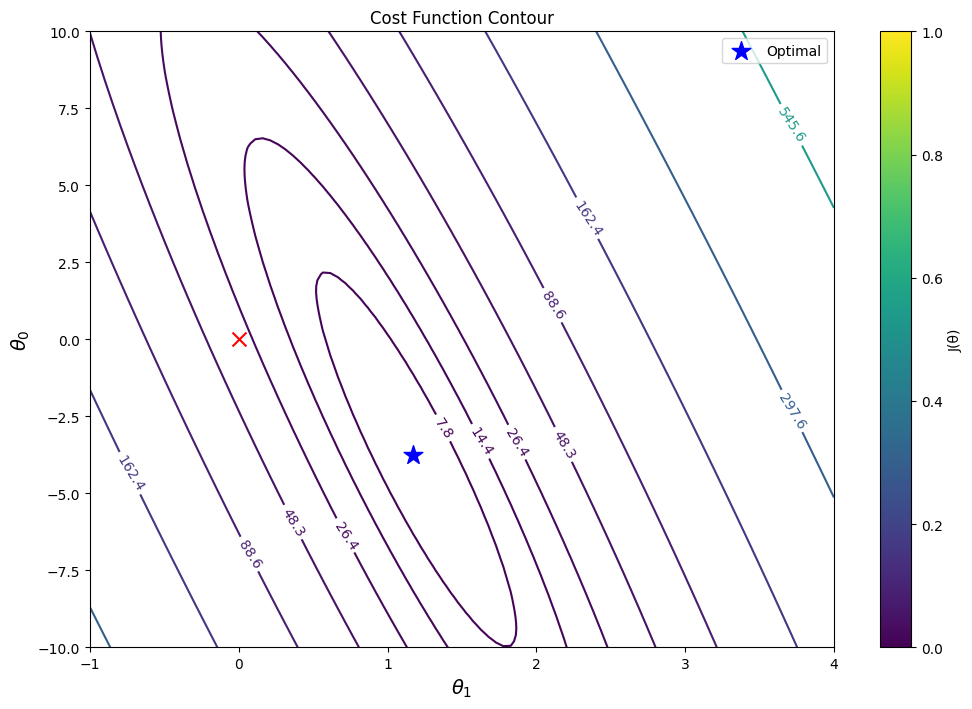

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 生成参数网格
theta0_vals = np.linspace(-10, 10, 100)  # θ0范围
theta1_vals = np.linspace(-1, 4, 100)    # θ1范围
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

# 计算每个参数组合的代价
cost_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta_current = np.matrix([theta0_vals[i], theta1_vals[j]])
        cost_vals[i,j] = computeCost(X, y, theta_current)

# 绘制等高线图
plt.figure(figsize=(12,8))
contour = plt.contour(theta1_grid, theta0_grid, cost_vals.T, levels=np.logspace(-2, 3, 20))
plt.clabel(contour, inline=1, fontsize=10)
plt.scatter(theta[0,1], theta[0,0], c='r', marker='x', s=100)  # 标记初始参数位置

# 标注最小值区域
min_idx = np.unravel_index(np.argmin(cost_vals), cost_vals.shape)
plt.scatter(theta1_vals[min_idx[1]], theta0_vals[min_idx[0]], 
           c='blue', marker='*', s=200, label='Optimal')

# 图表装饰
plt.title('Cost Function Contour')
plt.xlabel(r'$\theta_1$', fontsize=14)
plt.ylabel(r'$\theta_0$', fontsize=14)
plt.colorbar(label='J(θ)')
plt.legend()
plt.show()

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$
其中
$$\frac{\partial }{\partial {{\theta }_{1}}}J(\theta)=\frac{1}{m}\sum\limits_{i=1}^{m}{\left( \left( {{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)\cdot {{x}_j^{(i)}} \right)}$$

In [15]:
def gradientDescent(X, y, theta, alpha, loops):
    temp = np.matrix(np.zeros(theta.shape)) # 定义一个暂存theta的矩阵
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(loops)
    
    for i in range(loops): # 迭代次数
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - (alpha / len(X) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

定义学习率$\alpha$和迭代次数loops

In [16]:
alpha = 0.01
loops = 1000

In [17]:
theta, err = gradientDescent(X, y, theta, alpha, loops) # err 记录了1000次迭代的代价函数值
theta

matrix([[-3.24140214,  1.1272942 ]])

最后我们用训练好的参数去获取最终结果

In [18]:
computeCost(X, y, theta)

4.515955503078914

其实可以发现，与误差相比，训练过后的误差减小了许多，此时我们位于一个**局部最低点**
<br/>
现在我们来绘制线性模型以及数据，直观地看出它的拟合。

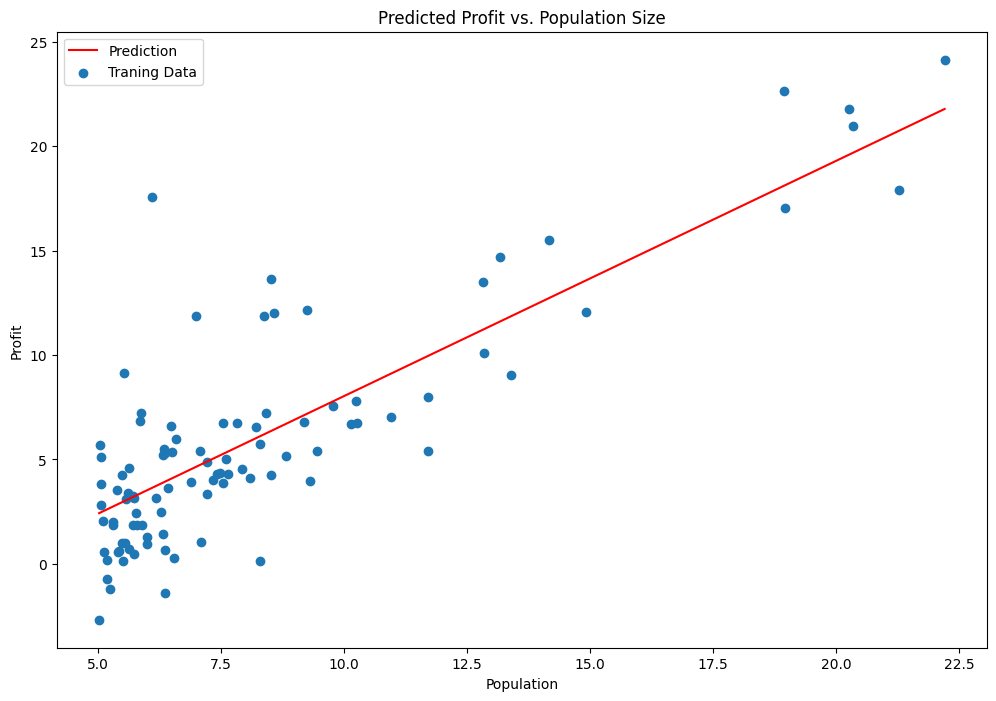

In [19]:
x = np.linspace(data.Population.min(), data.Population.max(), 100) # 等距地生成100个数
f = theta[0, 0] + (theta[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, color='r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2) # 在左上角显式图例
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

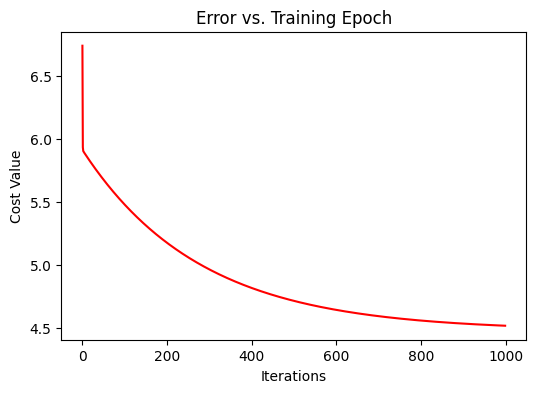

In [20]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(np.arange(loops), err, color='red')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')
ax.set_title('Error vs. Training Epoch')
plt.show()

其实也可以通过正规方程来求解线性回归。

正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$。

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [21]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [22]:
final_theta2 = normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])

我们会发现这里用正规方程求出的值与梯度下降略有不同，一部分原因是因为梯度下降的迭代次数可能不够，另一部分原因是因为梯度下降求出的是局部最小值。